In [1]:
%load_ext autoreload
%autoreload 2

In [369]:
from Models.DeBruijn.Graph import Graph
from Models.Decoder import Decoder
from utils.converter import str2ncs, ncs2str
from utils.mutant import errors_add
from Models.Decoder.Decoder import DFS, BFS
import time


In [416]:
# original = str2ncs('$Pham Hong Son%')
original = str2ncs('$Nam quoc son ha nam de cu, tuyet nhien dinh phan tai thien thu%')
print(original)
datas = errors_add(original, 0.04, 50)

# original = 'TTGAACGGCGGCTGTTAA'
# datas = ['TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA']
# datas = ['TTGAACGGCGGCTGTTAA', 'TTGAACGGCGACTGTTAA', 'TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA']
# datas = ['TTGAACGGCGGCTGTTAA', 'TTGAACGTGCGGCTGTTAA', 'TTGAACGGCGCTGTTAA', 'TTGAACGGCGGCTGTTAA']


TTGCTCACTACAAGCTATGATTGTTCAAGCTGATGTCTCAGCCGTACTAGCCTCACTACAAGCTACCTAAGCTCAGATCCGAGCTAGGATGACCTATAGAGCCTCCGTCTGCTACTCAGCTACCTGCTCCGTAGCGAGCGTACTCTCAGCTAGACTCTGAGCTAGCGTCTGCTACTCAGCTAGCGTGATTAA


In [417]:
# error 10% 100 copy kmer 24 prune > 1 bfs 0.006s total 0.13s
# error 1% 50 copy kmer 24 prune > 6 0.003s
# error 4% 50 copy kmer 24 prune > 6 bfs 0.004s total 0.12s

prune = 6
decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=24, visualization=False)
# decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=True)
# decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=True)
rs = decoder.decode(BFS(min_weight=prune, db=100))
print(time.time() - start)
rs
# TTGAACGGCGGCTGTTAA
# TTGAACGGCGGCTGTTAA
# TTGAACGGCGACTGTTAA
# TTGAACGGCGGCTGTTAA

#TTGCTCACTACAAGCTATGATTGTTCAAGCTGATGTCTCAGCCGTACTAGCCTCACTACAAGCTACCTAAGCTCAGATCCGAGCTAGGATGACCTATAGAGCCTCCGTCTGCTACTCAGCTACCTGCTCCGTAGCGAGCGTACTCTCAGCTAGACTCTGAGCTAGCGTCTGCTACTCAGCTAGCGTGATTAA
#TTGCTCACTACAAGCTAGACTCTGAGCTAGCGTCTGCTACTCAGCTAGGATGACCTATAGAGCCTCCGTAGCGAGCGTACTCTCAGCCGTACTAGCCTCACTACAAGCTATGATTGTTCAAGCTGATGTCTCAGCTACCTGCTCCGTCTGCTACTCAGCTACCTAAGCTCAGATCCGAGCTAGCGTGATTAA

51 2
101 2
151 1
0.07748103141784668


(True,
 ['TTGCTCACTACAAGCTATGATTGTTCAAGCTGATGTCTCAGCCGTACTAGCCTCACTACAAGCTACCTAAGCTCAGATCCGAGCTAGGATGACCTATAGAGCCTCCGTCTGCTACTCAGCTACCTGCTCCGTAGCGAGCGTACTCTCAGCTAGACTCTGAGCTAGCGTCTGCTACTCAGCTAGCGTGATTAA'])

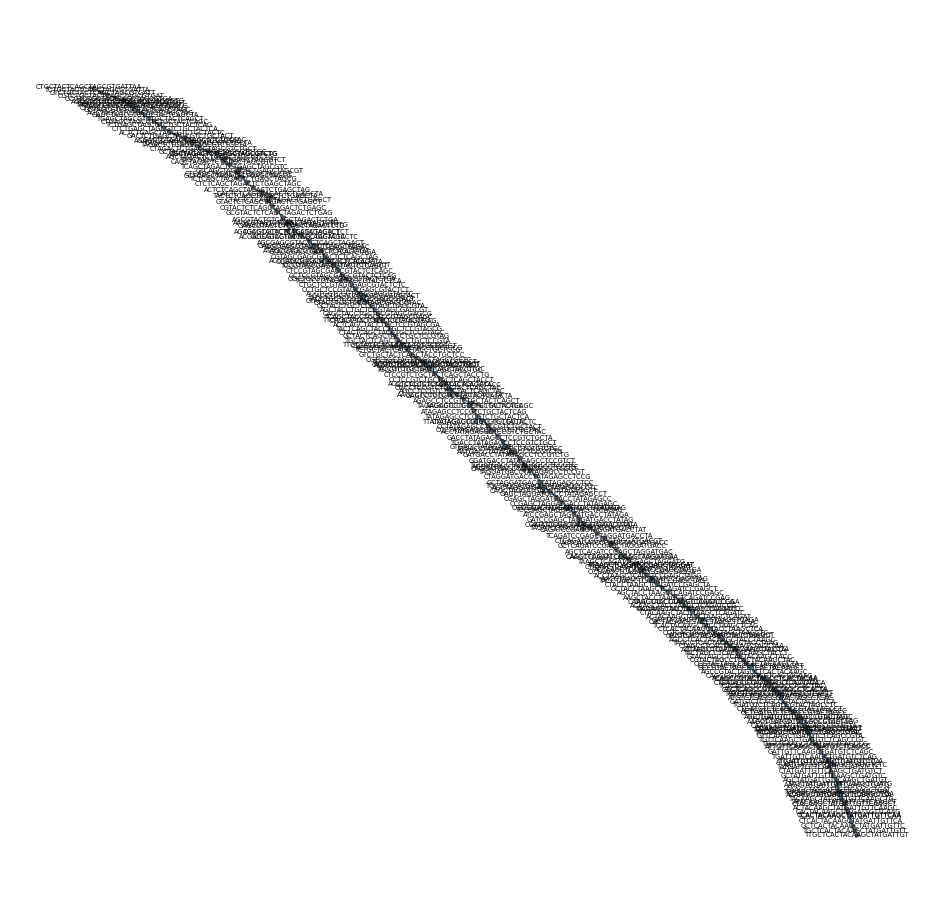

In [418]:
# decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=True)
decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=False, node_size=1)


In [ ]:
decoder.decode(BFS(min_weight=2, db=100))


In [ ]:
# TTGAACGGCGGCTGTTAA
# TTGAACGGCGACTGTTAA
# TTGAACGGCGACTGTTAA

In [ ]:
# datas = ['GAGCGATGTCTC', 'GAGTGATGTTC', 'GAGTGTTGTCTC']
# datas = ['GAGTGTTGTCTC']
# datas = ['TAATGCCATGGGATGTT']
# datas = ['AAAGGCGTTGAGGTT']
original = 'AACGGCGGCTGT'
datas = ['AACGGCGGCTGT', 'AACGGCGGCTGT', 'AACGGCGGCTGT', 'AACGGCGGCTGT']
datas = ['AACGGCGGCTGT', 'AACGGCGACTGT', 'AACGGCGGCTGT', 'AACGGCGGCTGT']
datas = ['AACGGCGGCTGT', 'AACGTGCGGCTGT', 'AACGGCGCTGT', 'AACGGCGGCTGT']

original = str2ncs('$Pham Son%')
print(original)
datas = errors_add(original, 0.1, 20)

graph = Graph(data = datas, data_length=len(original), kmer_size=15)
graph.build()
graph.draw_de_bruijn_graph(weight_on=False, minimize_edge=True, font_size=8)

graph

In [ ]:
datas

In [ ]:
graph.get_vertexes()

In [13]:
ncs = str2ncs('$Pham Son%')
print(ncs)
string = ncs2str('GAGTGATGTCTC')
print(string)

TTGGAGCGTACTACAAGCTGATGTCTCTAA
PSON


In [ ]:
d = 'AACGGCGGCTGT'

ds = errors_add(d, 0.1, 4)
ds

In [12]:
a = ['12', '34', '56', '78', '9']
'132' in a

False